## Lesson 1

## Importing and installing QISKIT

In [1]:
import qiskit


In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.1',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.5',
 'qiskit-aqua': '0.6.2',
 'qiskit': '0.14.1'}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('Type in the id you get from your IBM account')

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Lesson 2

## Hello World to Quantum Computer

In [6]:
from qiskit import *

In [7]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [8]:
circuit = QuantumCircuit(qr,cr)

In [9]:
%matplotlib inline

In [10]:
circuit.draw()

In [11]:
circuit.h(qr[0])

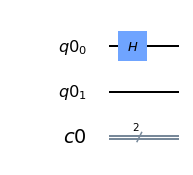

In [12]:
circuit.draw(output='mpl')

In [13]:
circuit.cx(qr[0], qr[1])

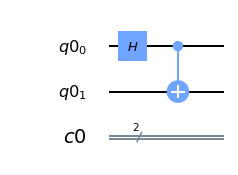

In [14]:
circuit.draw(output='mpl')

In [15]:
circuit.measure(qr,cr)

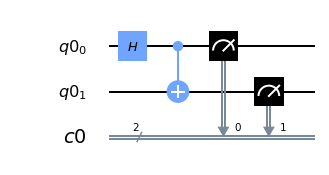

In [16]:
circuit.draw(output='mpl')

### aer is used as a simulator to run quantum simulations in classical computers


In [17]:
simulator = Aer.get_backend('qasm_simulator')

In [18]:
result = execute(circuit,backend=simulator).result()

In [19]:
from qiskit.tools.visualization import plot_histogram


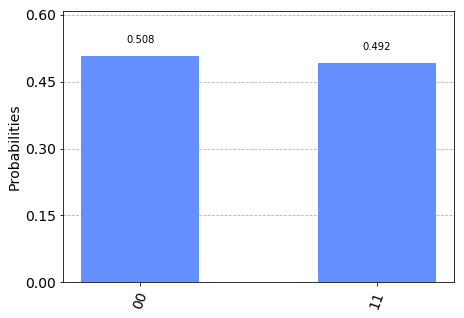

In [20]:
plot_histogram(result.get_counts(circuit))

In [21]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

In [23]:
job = execute(circuit, backend=qcomp)

In [24]:
from qiskit.tools.monitor import job_monitor

In [25]:
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()

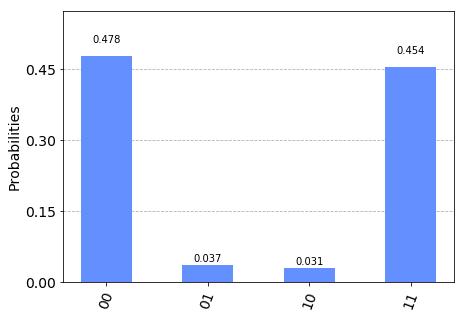

In [27]:
plot_histogram(result.get_counts(circuit))

## Lesson 3

## Bulidng blocks of Quantum Computers

In [28]:
from qiskit import *

In [29]:
from qiskit.tools.visualization import plot_bloch_multivector

[0.+0.j 1.+0.j]


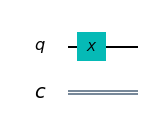

In [30]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result  = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output = 'mpl')

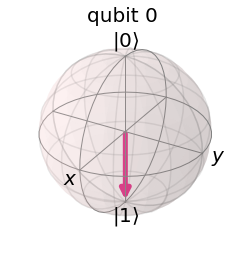

In [31]:
plot_bloch_multivector(statevector)

In [32]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()


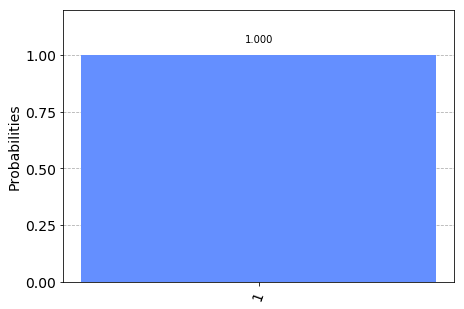

In [33]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Print Matrix

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


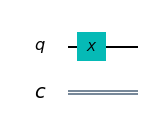

In [34]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result  = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)
%matplotlib inline
circuit.draw(output = 'mpl')

## Quantum Teleportation Algorithm

In [35]:
from qiskit import *
%matplotlib inline

In [36]:
circuit = QuantumCircuit(3,3)

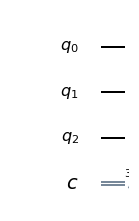

In [37]:
circuit.draw(output='mpl')

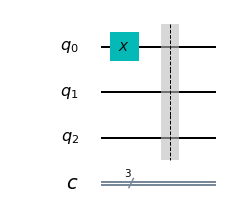

In [38]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

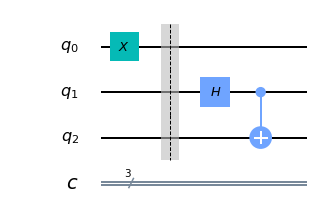

In [39]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

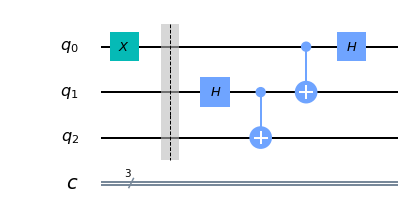

In [40]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

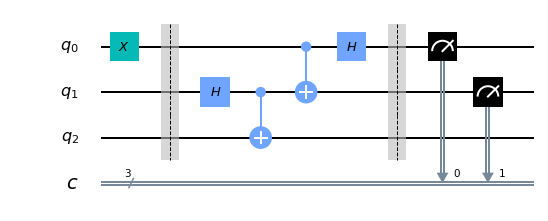

In [41]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

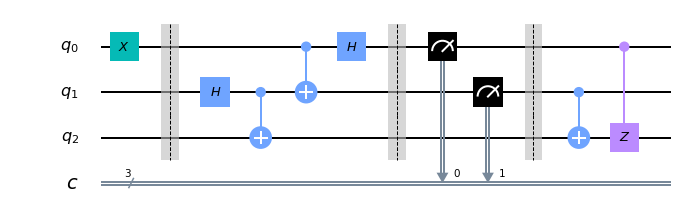

In [42]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

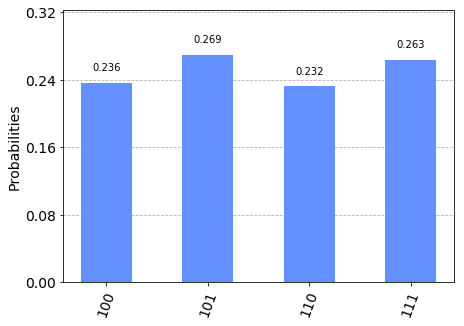

In [43]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator, shots=1024).result()
counts  = result.get_counts()
plot_histogram(counts)

In [44]:
print(counts)

{'100': 242, '101': 275, '110': 238, '111': 269}


## Lesson 4


## Bernstein Vazirani Algorithm

In [45]:
from qiskit import *
%matplotlib inline

In [46]:
from qiskit.tools.visualization import plot_histogram

In [47]:
secretnumber = '10000001'

In [48]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

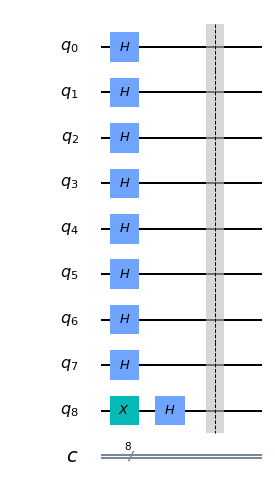

In [49]:
circuit.draw(output='mpl')

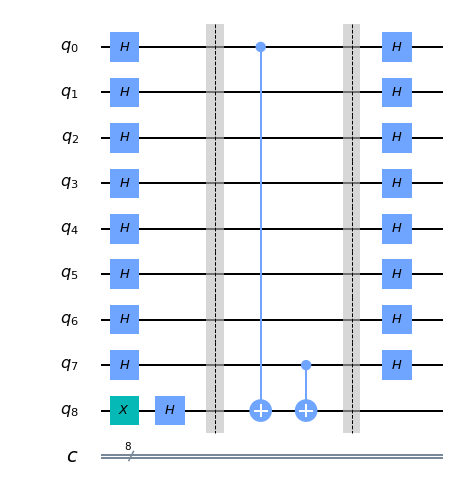

In [50]:
for ii, yesno in enumerate(secretnumber):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))


# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)

circuit.barrier()

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.draw(output='mpl')

In [51]:
circuit.barrier()

# circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

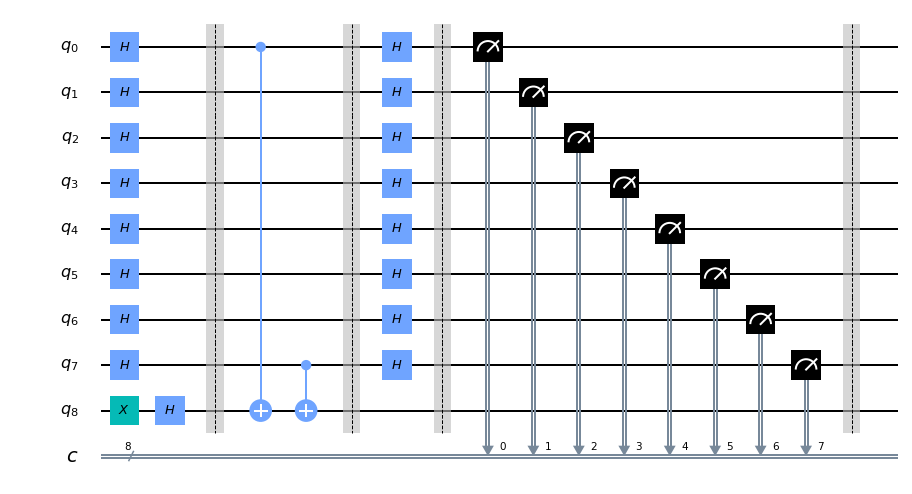

In [52]:
circuit.barrier()
circuit.draw(output='mpl')

In [53]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()

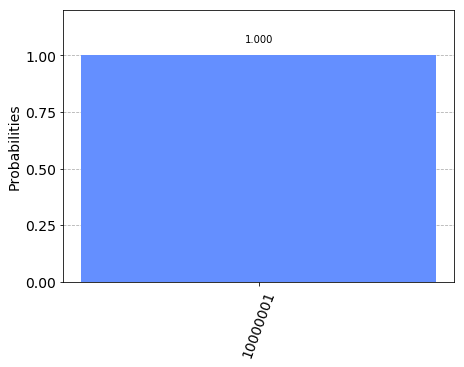

In [54]:
counts = result.get_counts()
plot_histogram(counts)

In [55]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor

job_monitor(job)

result = job.result()

plot_histogram(result.get_counts(circuit))

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job incurred error     


IBMQJobFailureError: 'Unable to retrieve job result. Job has failed. Use job.error_message() to get more details.'

## Mitigating Noise On Real Quantum Computers

In [57]:
import qiskit
from qiskit import *

In [60]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

In [61]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram


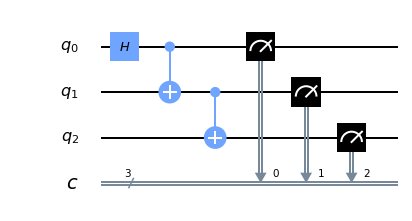

In [63]:
circuit.draw(output='mpl')

In [65]:
simulator =  Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

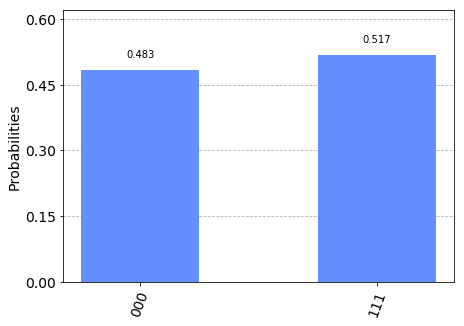

In [68]:
plot_histogram(result.get_counts(circuit))